# Worksheet 02

Name: Mariano Majano Amaya 
UID: U56063451

### Topics

- Effective Programming

### Effective Programming

a) What is a drawback of the top down approach?

The code is not runnable until the end

b) What is a drawback of the bottom up approach?

You have to know everything upfront, which is not always possible.

c) What are 3 things you can do to have a better debugging experience?

Read why there's an error. Figure it where it occured and understanding what it's telling you.
Re-read your code and try to visualize how it works and the logic behing it.
See if everything is set up properly.

d) (Optional) Follow along with the live coding. You can write your code here:

## Exercise

This exercise will use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data). Download the file named `train.csv` and place it in the same folder as this notebook.

The goal of this exercise is to practice using [pandas](https://pypi.org/project/pandas/) methods. If your:

1. code is taking a long time to run
2. code involves for loops or while loops
3. code spans multiple lines

look through the pandas documentation for alternatives. This [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) may come in handy.

a) Complete the code below to read in a filepath to the `train.csv` and returns the DataFrame.

In [1]:
import pandas as pd

df = pd.read_csv('train.csv')
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


b) Complete the code so it returns the number of rows that have at least one empty column value

In [4]:
import pandas as pd

df = pd.read_csv('train.csv')

num_rows_with_empty = df.isnull().any(axis=1).sum()

print("There are " +  str(num_rows_with_empty) + " rows with at least one empty value")

There are 708 rows with at least one empty value


c) Complete the code below to remove all columns with more than 200 NaN values

In [5]:
import pandas as pd

df = pd.read_csv('train.csv')

# Removing columns with more than 200 NaN values
df = df.dropna(axis=1, thresh=len(df) - 200)

# Display the remaining columns
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

d) Complete the code below to replaces `male` with 0 and `female` with 1

In [6]:
import pandas as pd

df = pd.read_csv('train.csv')

# Replacing 'male' with 0 and 'female' with 1 in the 'Sex' column
df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})

# Displaying the first few rows of the DataFrame
df.head()


/var/folders/8s/ph8bdmhd7c743w8_56xg70tw0000gn/T/ipykernel_3186/3732672791.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sex'] = df['Sex'].replace({'male': 0, 'female': 1})


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


e) Complete the code below to add four columns `First Name`, `Middle Name`, `Last Name`, and `Title` corresponding to the value in the `name` column.

For example: `Braund, Mr. Owen Harris` would be: 

|First Name | Middle Name | Last Name | Title |
|-----------|-------------|-----------|-------|
| Owen      |  Harris     |  Braund   | Mr    |

Anything not clearly one of the above 4 categories can be ignored.

In [7]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Set pandas to display all columns
df = pd.read_csv('train.csv')

# Function to extract the title from the name
def extract_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    return ''

# Function to extract the first and middle names
def extract_first_middle_names(name):
    parts = name.split(',')
    if len(parts) > 1:
        name_parts = parts[1].split('.')
        if len(name_parts) > 1:
            first_middle = name_parts[1].strip().split(' ')
            if len(first_middle) > 1:
                return first_middle[0], ' '.join(first_middle[1:])
            return first_middle[0], ''
    return '', ''

# Extracting title, first name, middle name, and last name
df['Title'] = df['Name'].apply(extract_title)
df['First Name'], df['Middle Name'] = zip(*df['Name'].apply(extract_first_middle_names))
df['Last Name'] = df['Name'].apply(lambda x: x.split(',')[0])

# Displaying the first few rows of the DataFrame
print(df[['First Name', 'Middle Name', 'Last Name', 'Title']].head())


  First Name                       Middle Name  Last Name Title
0       Owen                            Harris     Braund    Mr
1       John  Bradley (Florence Briggs Thayer)    Cumings   Mrs
2      Laina                                    Heikkinen  Miss
3    Jacques             Heath (Lily May Peel)   Futrelle   Mrs
4    William                             Henry      Allen    Mr


f) Complete the code below to replace all missing ages with the average age

In [10]:
average_age = df['Age'].mean()
# print(average_age)

# Replace NaN vals with mean
df['Age'] = df['Age'].fillna(average_age)

df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


g) Plot a bar chart of the average age of those that survived and did not survive. Briefly comment on what you observe.

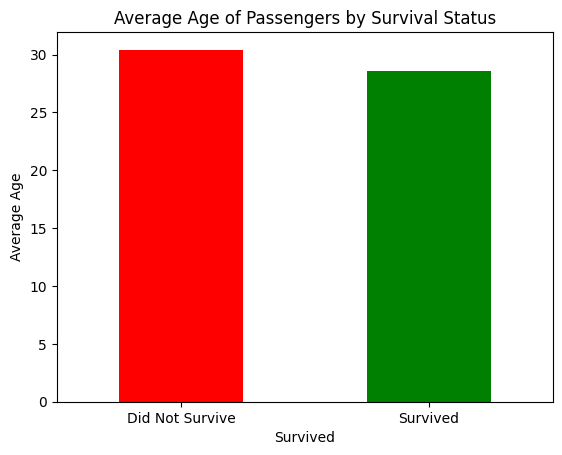

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('train.csv')

# Replace all missing ages with the average age
df['Age'] = df['Age'].fillna(df['Age'].mean())

# Grouping by 'Survived' and calculating the average age
avg_age_by_survival = df.groupby('Survived')['Age'].mean()

# Plotting the bar chart
avg_age_by_survival.plot(kind='bar', color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Average Age')
plt.title('Average Age of Passengers by Survival Status')
plt.xticks(ticks=[0, 1], labels=['Did Not Survive', 'Survived'], rotation=0)
plt.show()



There is a noticeable difference in the average age of passengers who survived versus those who did not. Passengers who did not survive tend to have a higher average age compared to those who survived. This could be due to various factors, such as younger passengers being more physically able to reach lifeboats or being given priority during rescue operations